# 🌍 Regional Economic Comparison (World Bank Dataset)

This notebook focuses on comparing economic indicators **across regions**  
(e.g., Asia, Europe, Africa, North America, South America, Oceania).  

We will explore:  
- Regional averages for GDP, GDP per capita, inflation, and unemployment.  
- Trends over time by region.  
- Regional disparities and gaps between developed and developing areas. 

1.  Import Libraries

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.float_format", "{:,.2f}".format)

2. Load Dataset

In [2]:
# Load dataset (reuse the same CSV from global analysis)
df = pd.read_csv("../data/world_bank_data_2025.csv")

df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.08,"2,453,597,206.70","24,093.14",NaN,11.67,-1.22,-2.73,-18.75,NaN,NaN,NaN,"2,313,385,195.53",NaN
1,Aruba,aw,2011,4.32,"2,637,859,217.88","25,712.38",NaN,4.80,4.01,3.37,-9.88,NaN,NaN,NaN,"2,391,841,396.65",NaN
2,Aruba,aw,2012,0.63,"2,615,208,379.89","25,119.67",NaN,8.20,0.18,-1.04,3.47,NaN,NaN,NaN,"2,499,117,877.09",NaN
3,Aruba,aw,2013,-2.37,"2,727,849,720.67","25,813.58",NaN,10.71,-2.00,6.43,-11.81,NaN,NaN,NaN,"2,563,517,262.57",NaN
4,Aruba,aw,2014,0.42,"2,790,849,720.67","26,129.84",NaN,3.21,3.96,-1.59,-4.66,NaN,NaN,NaN,"2,688,102,402.23",NaN


3. Add Region Mapping

In [3]:
# Simple region mapping (expand later)
asia = ["Indonesia", "China", "India", "Japan", "Singapore", "Malaysia", "Thailand", "Vietnam"]
europe = ["Germany", "France", "United Kingdom", "Italy", "Spain"]
north_america = ["United States", "Canada", "Mexico"]
south_america = ["Brazil", "Argentina", "Chile"]
africa = ["Nigeria", "South Africa", "Egypt", "Kenya"]
oceania = ["Australia", "New Zealand"]

def map_region(country):
    if country in asia: return "Asia"
    elif country in europe: return "Europe"
    elif country in north_america: return "North America"
    elif country in south_america: return "South America"
    elif country in africa: return "Africa"
    elif country in oceania: return "Oceania"
    else: return "Other"

df["region"] = df["country_name"].apply(map_region)
df[["country_name", "region"]].head(10)

,country_name,region
0,Aruba,Other
1,Aruba,Other
2,Aruba,Other
3,Aruba,Other
4,Aruba,Other
5,Aruba,Other
6,Aruba,Other
7,Aruba,Other
8,Aruba,Other
9,Aruba,Other


4. Regional Averages (Barplots)

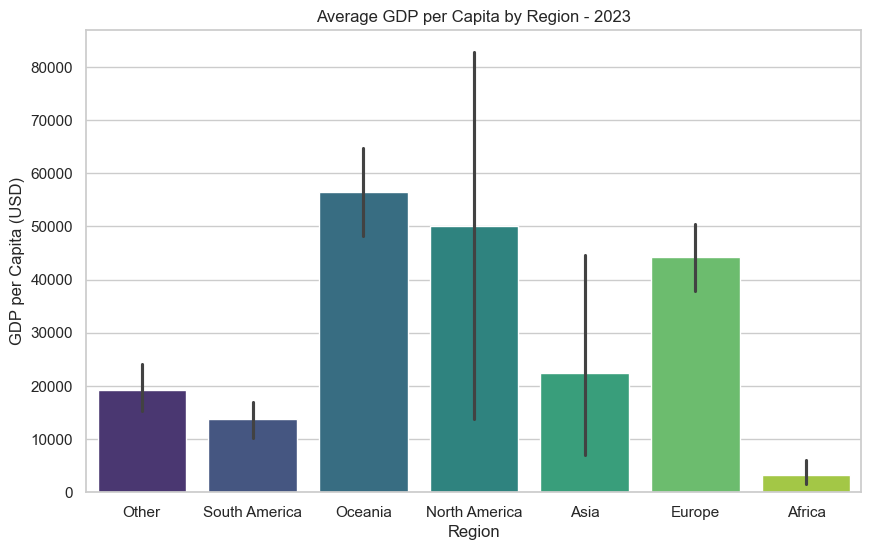

In [4]:
# Example: Average GDP per capita by region (latest year)
latest_year = df.dropna(subset=["GDP per Capita (Current USD)"])["year"].max()
df_latest = df[df["year"] == latest_year]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_latest,
    x="region", 
    y="GDP per Capita (Current USD)", 
    hue="region",          
    palette="viridis", 
    dodge=False,           
    legend=False           
)
plt.title(f"Average GDP per Capita by Region - {latest_year}")
plt.ylabel("GDP per Capita (USD)")
plt.xlabel("Region")
plt.show()

5. Trend Analysis per Region

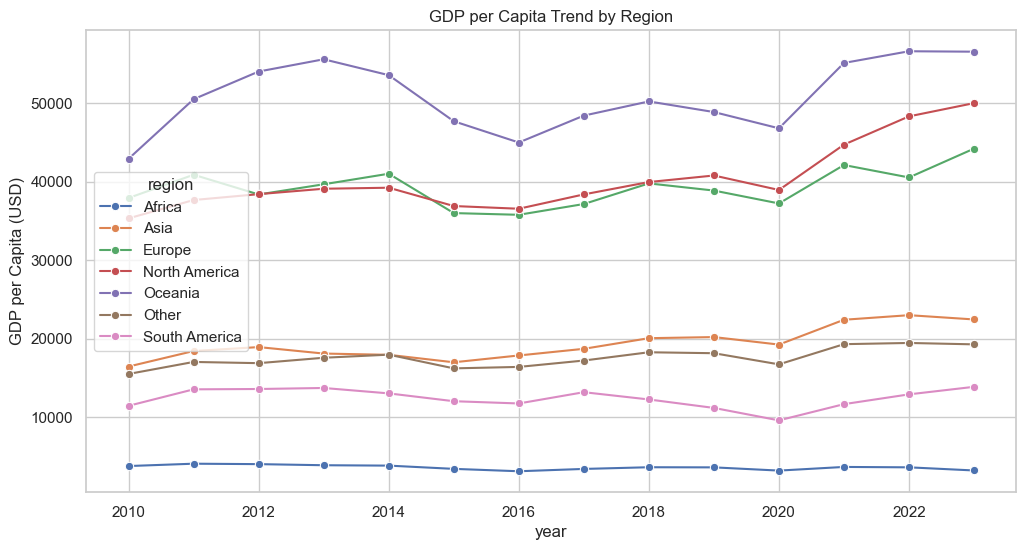

In [5]:
# GDP per capita trend by region
gdp_region = df.groupby(["year", "region"])["GDP per Capita (Current USD)"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_region, x="year", y="GDP per Capita (Current USD)", hue="region", marker="o")
plt.title("GDP per Capita Trend by Region")
plt.ylabel("GDP per Capita (USD)")
plt.show()

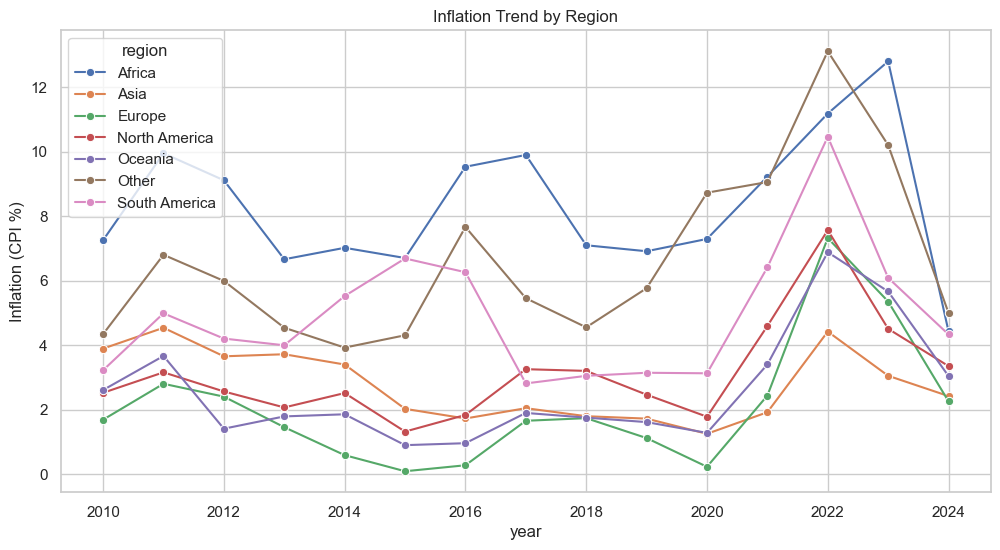

In [6]:
# Inflation trend per region
inflation_region = df.groupby(["year", "region"])["Inflation (CPI %)"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=inflation_region, x="year", y="Inflation (CPI %)", hue="region", marker="o")
plt.title("Inflation Trend by Region")
plt.ylabel("Inflation (CPI %)")
plt.show()

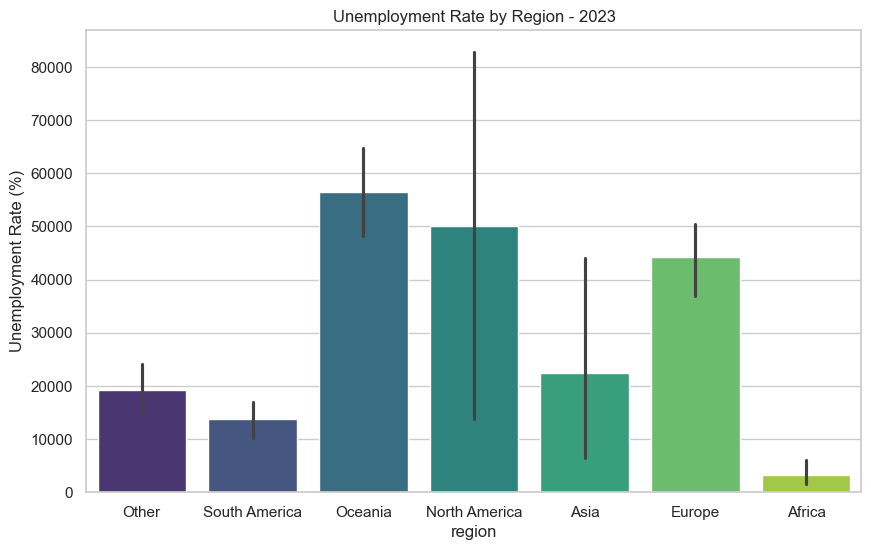

In [7]:
# Unemployment per region (latest year)
unemp_region = df_latest.groupby("region")["Unemployment Rate (%)"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_latest,
    x="region", 
    y="GDP per Capita (Current USD)", 
    hue="region",          
    palette="viridis", 
    dodge=False,           
    legend=False           
)
plt.title(f"Unemployment Rate by Region - {latest_year}")
plt.ylabel("Unemployment Rate (%)")
plt.show()

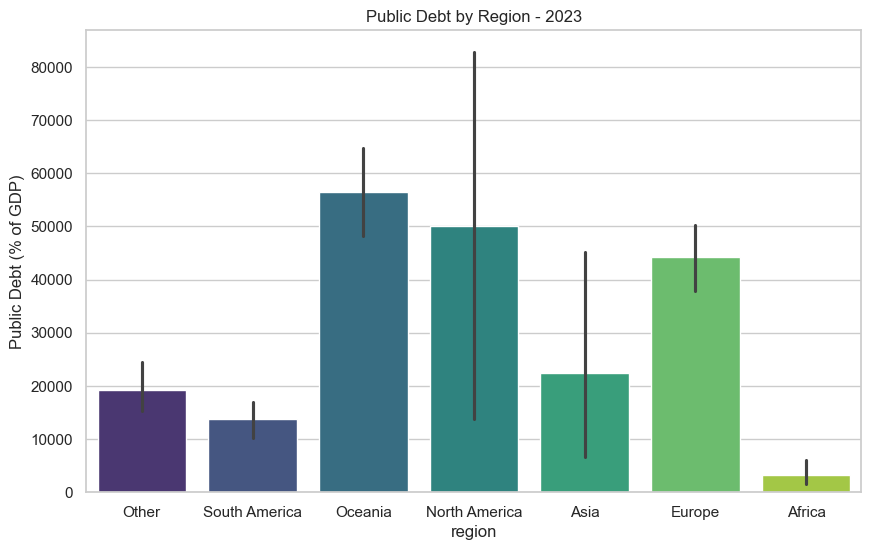

In [8]:
# Public debt per region (latest year)
debt_region = df_latest.groupby("region")["Public Debt (% of GDP)"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_latest,
    x="region", 
    y="GDP per Capita (Current USD)", 
    hue="region",          
    palette="viridis", 
    dodge=False,           
    legend=False           
)
plt.title(f"Public Debt by Region - {latest_year}")
plt.ylabel("Public Debt (% of GDP)")
plt.show()

# Key Insights (so far)

- Regional GDP per capita: Oceania and North America lead in average GDP per capita, while Africa and South America remain the lowest.
- Trends:
    - GDP per capita has generally increased across regions from 2010–2023, though Africa lags significantly.
    - Inflation trends are volatile, with sharp spikes in 2021–2022 across most regions.
- Unemployment rate: Africa shows the highest average unemployment rate, while Asia and North America maintain relatively low rates.
- Public debt: Europe records the highest debt levels relative to GDP, while Africa has the lowest.

# Conclusion

- Regional disparities are stark: Wealth concentration is clear in Oceania, North America, and parts of Europe, while Africa and South America face structural economic challenges.
- Volatility in inflation: Global shocks (e.g., post-pandemic recovery, supply chain disruptions, or geopolitical events) are reflected in inflation surges around 2021–2022.
- Unemployment and debt imbalances: High unemployment in Africa and rising debt in Europe may indicate vulnerabilities requiring targeted economic reforms.
- Policy implication: Regional analysis highlights that while global averages provide a broad picture, regional heterogeneity is critical for understanding economic resilience and risks.